In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [3]:
image_size = (224, 224)
batch_size = 32

directory = './fruits'

data_generator = ImageDataGenerator(
    rescale =1./255,
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range =0.2,
    horizontal_flip = True,
    validation_split=0.2
)

In [4]:
train_dataset = data_generator.flow_from_directory(
    directory, target_size =image_size, batch_size=batch_size, class_mode='categorical', shuffle=True, subset='training'
)

Found 288 images belonging to 9 classes.


In [5]:
test_dataset = data_generator.flow_from_directory(
    directory, target_size =image_size, batch_size=batch_size, class_mode='categorical', shuffle=True, subset='validation'
)

Found 71 images belonging to 9 classes.


In [6]:
class_labels = train_dataset.class_indices
class_names = list(class_labels.keys())
print(class_names[0])

apple fruit


In [8]:
input_layer = tf.keras.layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu')
pool1 = tf.keras.layers.MaxPooling2D(2, 2)
hidden_layer1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
pool2 = tf.keras.layers.MaxPooling2D(2, 2)
hidden_layer2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')
pool3 = tf.keras.layers.MaxPooling2D(2, 2)
hidden_layer3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
pool3 = tf.keras.layers.MaxPooling2D(2, 2)
flatten = tf.keras.layers.Flatten()
dense_layer =tf.keras.layers.Dense(512, activation='relu')
output_layer = tf.keras.layers.Dense(9, activation='softmax')


In [9]:
model = tf.keras.Sequential([input_layer, pool1, hidden_layer1, pool2, hidden_layer2, pool3, flatten, dense_layer, output_layer])

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, epochs=100, batch_size=3, validation_batch_size=32)

Epoch 1/100
9/9 [==============================] - 33s 4s/step - loss: 1.6352 - accuracy: 0.3194
Epoch 2/100
9/9 [==============================] - 30s 3s/step - loss: 1.5550 - accuracy: 0.4410
Epoch 3/100
9/9 [==============================] - 27s 3s/step - loss: 1.5014 - accuracy: 0.4306
Epoch 4/100
9/9 [==============================] - 27s 3s/step - loss: 1.4382 - accuracy: 0.4514
Epoch 5/100
9/9 [==============================] - 27s 3s/step - loss: 1.3394 - accuracy: 0.5035
Epoch 6/100
9/9 [==============================] - 28s 3s/step - loss: 1.2369 - accuracy: 0.5382
Epoch 7/100
9/9 [==============================] - 27s 3s/step - loss: 1.1857 - accuracy: 0.5625
Epoch 8/100
9/9 [==============================] - 27s 3s/step - loss: 1.1618 - accuracy: 0.5556
Epoch 9/100
9/9 [==============================] - 28s 3s/step - loss: 1.1569 - accuracy: 0.5625
Epoch 10/100
9/9 [==============================] - 32s 3s/step - loss: 1.0950 - accuracy: 0.6285
Epoch 11/100
9/9 [===========

In [15]:
(loss, accuracy) = model.evaluate(test_dataset)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

3/3 [==============================] - 4s 1s/step - loss: 1.5592 - accuracy: 0.7324
Loss:  1.5592198371887207
Accuracy:  0.7323943376541138


(224, 224, 3)


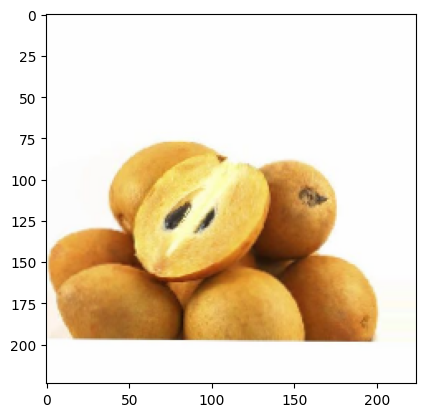

1/1 [==============================] - 0s 83ms/step
Prediction:  chickoo fruit
Confidence:  0.9953446


In [54]:
# try to make a prediction
images, labels = next(iter(train_dataset))

image = images[0]
print(image.shape)

plt.imshow(image)
plt.show()



img = np.array([image])

single_predict = model.predict(img)

print("Prediction: ",class_names[np.argmax(single_predict)])
print("Confidence: ", (np.max(single_predict)))

In [55]:
export_path_keras = "./models/{}.h5".format('FRUITCNN1')
model.save(export_path_keras)